In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')

c:\Users\HP\Invoice extraction\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
df = pd.read_csv(r'C:\Users\HP\Downloads\auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
print(df.shape)
df = df[df['horsepower'] != '?']
print(df.shape)

(398, 9)
(392, 9)


In [8]:
df['horsepower'] = df['horsepower'].astype(int)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

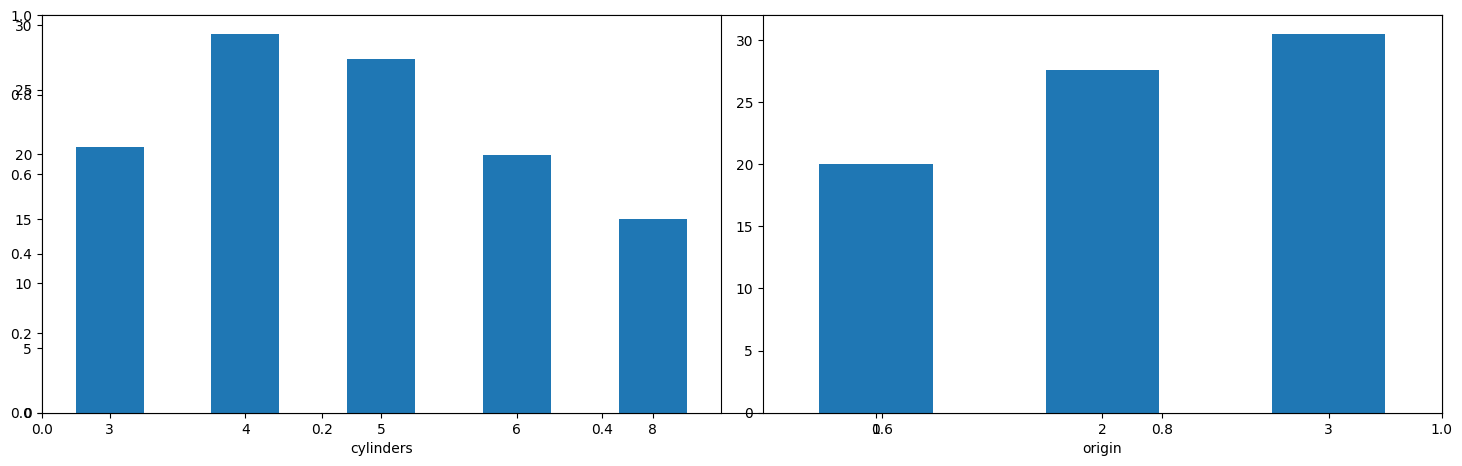

In [10]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

plt.subplots(figsize=(15, 5))
for i, col in enumerate(['cylinders', 'origin']):
    plt.subplot(1, 2, i+1)
    x = numeric_df.groupby(col).mean()['mpg']
    x.plot.bar()
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

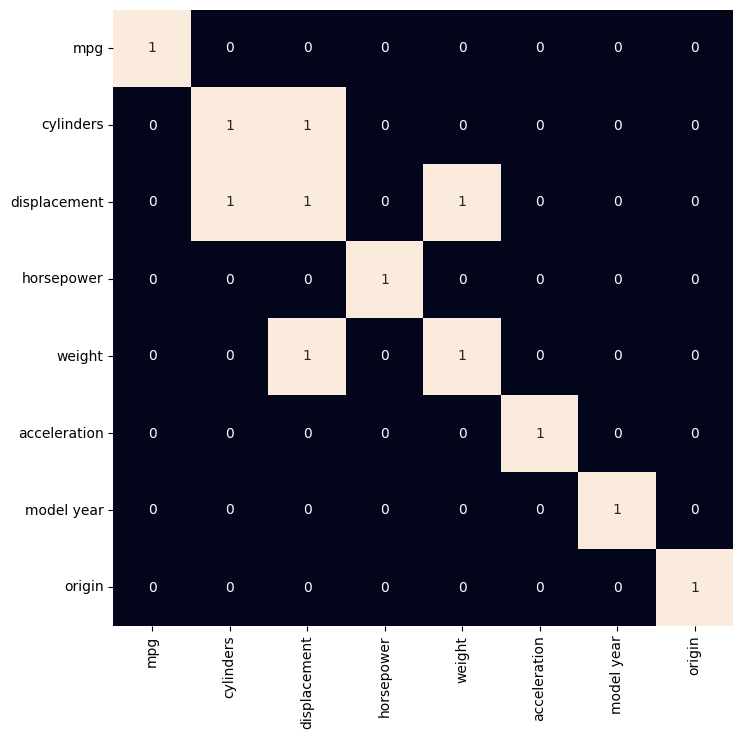

In [11]:
plt.figure(figsize=(8, 8))
sb.heatmap(numeric_df.corr() > 0.9,
		annot=True,
		cbar=False)
plt.show()

In [12]:
# Target
y = df['mpg'].values

In [13]:
from sklearn.model_selection import train_test_split

FEATURES = [
    'cylinders',
    'horsepower',
    'weight',
    'acceleration',
    'model year',
    'origin'
]

features = df[FEATURES]
target = df['mpg'].values

X_train, X_val, Y_train, Y_val = train_test_split(
    features,
    target,
    test_size=0.2,
    random_state=22
)


In [14]:
# Create car specification lookup table
car_lookup = (
    df.groupby('car name')[[
        'cylinders', 'horsepower', 'weight',
        'acceleration', 'model year', 'origin'
    ]]
    .mean()
    .round(2)
)

# Save lookup for Streamlit
car_lookup.to_pickle(r"C:\Users\HP\Invoice extraction\car_lookup.pkl")

print("Car lookup table saved")


Car lookup table saved


In [15]:
train_mean = X_train.mean()
train_std = X_train.std()


In [16]:
# Normalize train and validation data
X_train = (X_train - train_mean) / train_std
X_val = (X_val - train_mean) / train_std


In [17]:
AUTO = tf.data.experimental.AUTOTUNE

train_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_train, Y_train))
	.batch(32)
	.prefetch(AUTO)
)

val_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_val, Y_val))
	.batch(32)
	.prefetch(AUTO)
)

In [18]:
model = keras.Sequential([
    keras.Input(shape=(len(FEATURES),)),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1)
])


In [19]:
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mape']
)


In [20]:
# Build model
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1)
])

# Compile
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mape']
)

# Train
history = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds
)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 23.6167 - mape: 98.3155 - val_loss: 22.0924 - val_mape: 98.1529
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.3808 - mape: 97.1202 - val_loss: 21.8148 - val_mape: 96.7092
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23.0769 - mape: 95.4157 - val_loss: 21.4727 - val_mape: 94.9302
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.6892 - mape: 93.4582 - val_loss: 21.0386 - val_mape: 92.6784
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.2046 - mape: 91.0869 - val_loss: 20.5117 - val_mape: 89.9502
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.6125 - mape: 88.2255 - val_loss: 19.8792 - val_mape: 86.6782
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20.9049 - mape: 84.6748 - val_loss: 19.1324 - val_mape: 82.8173
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.0756 - mape: 80.7085 - val_loss: 18.2605 - val_mape: 78.3128
Epoch 9/50
10/10 ━━━━

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,621 (811.02 KB)

 Trainable params: 68,865 (269.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 137,732 (538.02 KB)

In [22]:
print(X_train.shape)
print(X_train.columns)


(313, 6)
Index(['cylinders', 'horsepower', 'weight', 'acceleration', 'model year',
       'origin'],
      dtype='object')


In [23]:
import pickle

model.save(r"C:\Users\HP\Invoice extraction\mpg_model.keras")

with open(r"C:\Users\HP\Invoice extraction\norm.pkl", "wb") as f:
    pickle.dump((train_mean, train_std), f)

print("Model and normalization values saved")


Model and normalization values saved


In [24]:
import os
os.listdir(r"C:\Users\HP\Invoice extraction")


['app.py',
 'car_lookup.pkl',
 'gail.py',
 'insta.py',
 'invoice1.py',
 'iogpl.py',
 'mpg_model.keras',
 'norm.pkl',
 'Predict_Fuel_Efficiency_Using_Tensorflow_in_Python.ipynb',
 'venv']

In [25]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,mape,val_loss,val_mape
0,23.616671,98.315498,22.092396,98.152924
1,23.380795,97.120163,21.814814,96.709206
2,23.076880,95.415688,21.472651,94.930191
3,22.689243,93.458168,21.038555,92.678413
4,22.204638,91.086853,20.511690,89.950157


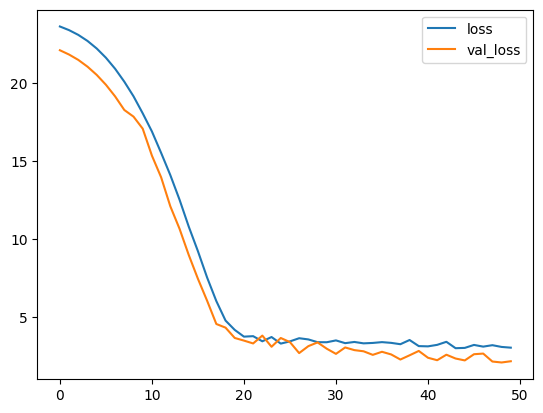

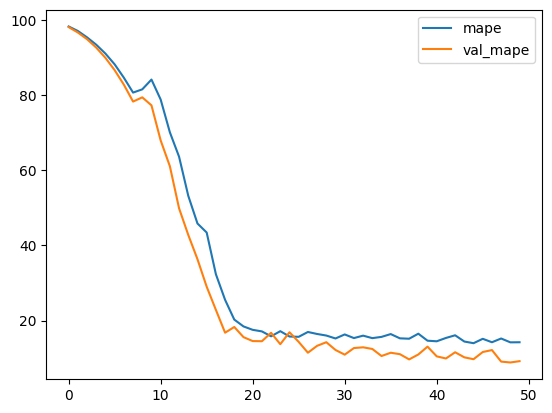

In [26]:
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['mape', 'val_mape']].plot()
plt.show()